In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style("darkgrid")
%matplotlib inline
import string
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize

## Lendo dataset

In [88]:
df = pd.read_csv('TrainingSet/sms-hamspam-train.csv', sep='\t', names=['class','message'])

In [3]:
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,spam,"SMSSERVICES. for yourinclusive text credits, p..."
2,spam,25p 4 alfie Moon's Children in need song on ur...
3,spam,U have a secret admirer. REVEAL who thinks U R...
4,spam,"Dear Voucher Holder, To claim this weeks offer..."


## Algumas analises

In [4]:
df.describe()

,class,message
count,4725,4725
unique,2,4423
top,ham,"Sorry, I'll call later"
freq,4100,24


In [5]:
df.groupby("class").describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4100   3862                             Sorry, I'll call later   24
spam      625    561  FREE for 1st week! No1 Nokia tone 4 ur mob eve...    3

In [6]:
# verificando valores nulos
df.isnull().sum()

class      0
message    0
dtype: int64

In [7]:
# verificando duplicados
df['message'].duplicated().sum()

302

ham     4100
spam     625
Name: class, dtype: int64


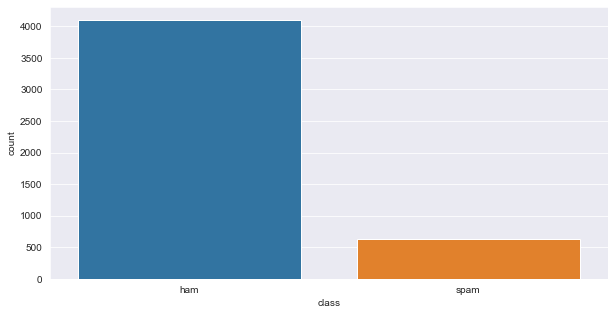

In [8]:
# Quantidade spams e quantos hams?
plt.figure(figsize=(10,5))
sns.countplot(data = df, x="class")
print(df["class"].value_counts())

In [9]:
# verificando algumas mensagens dados
for i in range(0, 5):
    print(df['message'][i], ' => ', df['class'][i])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  =>  ham
SMSSERVICES. for yourinclusive text credits, pls goto www.comuk.net login= 3qxj9 unsubscribe with STOP, no extra charge. help 08702840625.COMUK. 220-CM2 9AE  =>  spam
25p 4 alfie Moon's Children in need song on ur mob. Tell ur m8s. Txt Tone charity to 8007 for Nokias or Poly charity for polys: zed 08701417012 profit 2 charity.  =>  spam
U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901  =>  spam
Dear Voucher Holder, To claim this weeks offer, at you PC please go to http://www.e-tlp.co.uk/expressoffer Ts&Cs apply. To stop texts, txt STOP to 80062  =>  spam


#### Normalmente o SPAM tem seus textos maiores por ser mensagens que oferecem links ou numeros de telefone para entrar em contato como esta no exemplo acima. Com um gráfico poderemos verificar essa hipotése.

In [10]:
# Criando coluna com o numero de caracteres da mensagem
df["length_message"] = df["message"].str.len()
df.sample(5)

,class,message,length_message
2747,ham,Huh but i cant go 2 ur house empty handed right?,48
2128,ham,I love u 2 my little pocy bell I am sorry but ...,54
3925,ham,Ok then u tell me wat time u coming later lor.,46
4133,ham,I said its okay. Sorry,22
2317,ham,Cheers for the card ... Is it that time of yea...,56


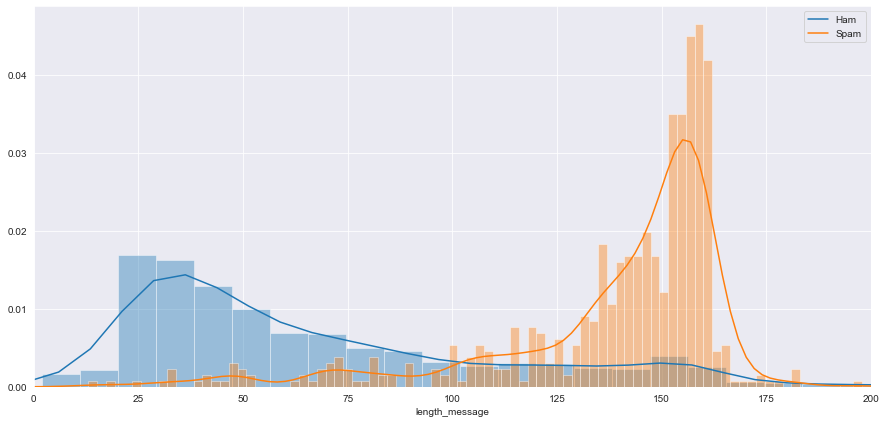

In [11]:
# Como podemos ver as mensagens de spam tendem a ser mais longas!

plt.figure(figsize=(15,7))
plt.xlim(0,200)
sns.distplot(df.loc[df["class"] == "ham"]["length_message"], 
                     kde_kws={"label": "Ham"}, bins = 100)
sns.distplot(df.loc[df["class"] == "spam"]["length_message"], 
                     kde_kws={"label": "Spam"}, bins = 100)

### WordCloud para verificar as palavras que mais se repetem em Ham e Spam

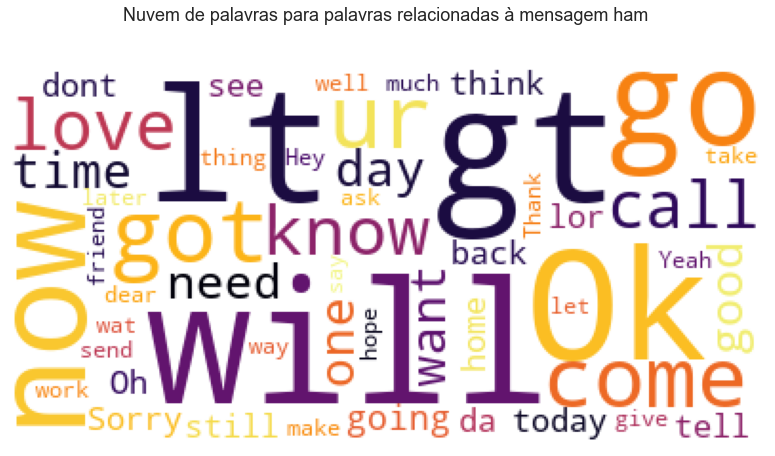

In [12]:
# Nuvem de palavras para palavras relacionadas à ham
from wordcloud import WordCloud
text=" ".join(post for post in df[df['class']=='ham'].message)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(text)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.title('Nuvem de palavras para palavras relacionadas à mensagem ham \n\n',fontsize=18)
plt.axis("off")
plt.show()

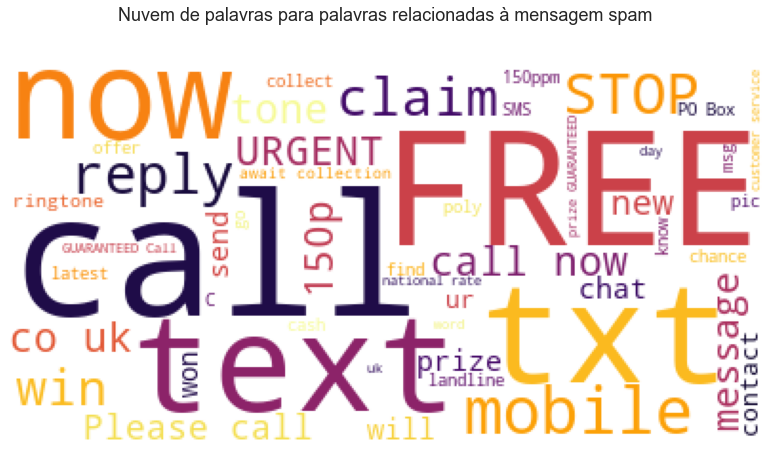

In [13]:
# Nuvem de palavras para palavras relacionadas à spam
from wordcloud import WordCloud
text=" ".join(post for post in df[df['class']=='spam'].message)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(text)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.title('Nuvem de palavras para palavras relacionadas à mensagem spam \n\n',fontsize=18)
plt.axis("off")
plt.show()

## Pré-Processamento
- Uma das etapas mais importantes do processo de aprendizado de máquinas é o pré-processamento. 
- O pré-processamento de um texto consiste em transformar a base de dados original em um formato mais conveniente para o processamento computacional. Umas dessas etapas é a remoção de stopwords, que são palavras que não devem ser consideradas na análise, como “o”, “e”, “a”, “de”, “que”, “do”, etc. Essas palavras são eliminadas pois não apresentam informações relevantes para a construção do modelo analisado, apenas definem ou articulam ideias.

### Planejamento
- Tokenizar texto com nltk
    * Remover pontuacão
    * Colocar todas as palavras em minusculo
    * Remover StopWords

In [89]:
def remove_punctuation_and_stopwords(message):
    """ remove puntuacao, stopwords e coloca a string em minusculo """
    
    message_no_punctuation = [ch for ch in message if ch not in string.punctuation]
    message_no_punctuation = "".join(message_no_punctuation).split()
    
    message_no_punctuation_no_stopwords = \
        [word.lower() for word in message_no_punctuation if word.lower() not in stopwords.words("english")]
        
    return message_no_punctuation_no_stopwords

In [90]:
df['message_clean'] = df['message'].apply(remove_punctuation_and_stopwords)
df["class"] = df["class"].map({"ham": 0, "spam": 1})
df.head()

,class,message,message_clean
0,0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,1,"SMSSERVICES. for yourinclusive text credits, p...","[smsservices, yourinclusive, text, credits, pl..."
2,1,25p 4 alfie Moon's Children in need song on ur...,"[25p, 4, alfie, moons, children, need, song, u..."
3,1,U have a secret admirer. REVEAL who thinks U R...,"[u, secret, admirer, reveal, thinks, u, r, spe..."
4,1,"Dear Voucher Holder, To claim this weeks offer...","[dear, voucher, holder, claim, weeks, offer, p..."


Para o treinamento do modelos será criado um pipeline com os dados
 * Bag-of-Words (BOW)
 * TF-IDF: Term Frequency - Inverse Document Frequency

**Bag-of-Words:** É uma representação simplificada usada no processamento de linguagem natural e na recuperação de informações (IR).
 
Exemplo:

(1) John gosta de assistir filmes. Mary também gosta de filmes.

(2) John também gosta de assistir jogos de futebol.

Com base nesses dois documentos de texto, uma lista é construída da seguinte forma:

[ 
    "John" , 
    "gosta" , 
    "de" , 
    "assistir" , 
    "filmes" , 
    "Mary" , 
    "também" , 
    "futebol" , 
    "jogos" 
]

**TF-IDF: Term Frequency - Inverse Document Frequency**
- use o método transform (...) para transformar a matriz de contagem em uma representação tf-idf.

- O valor tf–idf (abreviação do inglês term frequency–inverse document frequency, que significa frequência do termo–inverso da frequência nos documentos), é uma medida estatística que tem o intuito de indicar a importância de uma palavra de um documento em relação a uma coleção de documentos ou em um corpus linguístico.


In [91]:
def untokenize_text(tokens):
    """Desfaz a tokenização"""
    ls = []

    for tk_line in tokens:
        new_line = ''
        
        for word in tk_line:
            new_line += word + ' '
            
        ls.append(new_line)
        
    return ls

In [92]:
dataset_train = untokenize_text(df['message_clean'])

In [93]:
# check data
for i in range(0, 5):
    print(dataset_train[i])

go jurong point crazy available bugis n great world la e buffet cine got amore wat 
smsservices yourinclusive text credits pls goto wwwcomuknet login 3qxj9 unsubscribe stop extra charge help 08702840625comuk 220cm2 9ae 
25p 4 alfie moons children need song ur mob tell ur m8s txt tone charity 8007 nokias poly charity polys zed 08701417012 profit 2 charity 
u secret admirer reveal thinks u r special call 09065174042 opt reply reveal stop 150 per msg recd cust care 07821230901 
dear voucher holder claim weeks offer pc please go httpwwwetlpcoukexpressoffer tscs apply stop texts txt stop 80062 


In [98]:
# criar um objeto vetorizador de contagem
vectorizer = CountVectorizer()
dataset_train_vec = vectorizer.fit_transform(dataset_train)

In [99]:
dataset_train_vec.shape

(4725, 8633)

In [100]:
tfidf_transformer = TfidfTransformer()
data_tfidf = tfidf_transformer.fit_transform(dataset_train_vec)

In [101]:
data_tfidf.shape

(4725, 8633)

## Treinamento do modelo

### Criação de conjuntos de dados de treinamento e teste.

In [102]:
from sklearn.model_selection import train_test_split

data_tfidf_train, data_tfidf_test, label_train, label_test = \
    train_test_split(data_tfidf, df["class"], test_size=0.3)

## Preparar o algoritmo e executar o modelo
- Treinando um classificador - MultinomialNB

- Uma das formas mais antigas para tratar desse problema é por meio do algoritmo de Naive Bayes, um classificador probabilístico simples que parte da premissa que há independência entre as características (features) de um modelo. Ou seja, ele recebe o nome de “naive” (ingênuo) porque desconsidera a correlação entre as variáveis.

- Exemplo: na frase “Eu amo meus pais, mas hoje o dia está horrível” o classificador assume que as palavras dessa frase não dependem umas das outras. Sendo assim, a polaridade de uma sentença pode ser positiva caso a maioria das palavras tenham uma probabilidade maior de serem positivas.

In [103]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
spam_detect_model = nb_model.fit(data_tfidf_train, label_train)

### Predição  

Com o modelo Naive Bayes treinado agora podemos usá-lo para prever se a mensagem em nosso conjunto de dados de teste são spams ou não.

In [104]:
pred_test_MNB = spam_detect_model.predict(data_tfidf_test)
from sklearn.metrics import accuracy_score
acc_MNB = accuracy_score(label_test, pred_test_MNB)
print(acc_MNB)

0.9619181946403385


## Matriz de confusão

É uma tabela que permite a visualização do desempenho de um algoritmo de classificação.

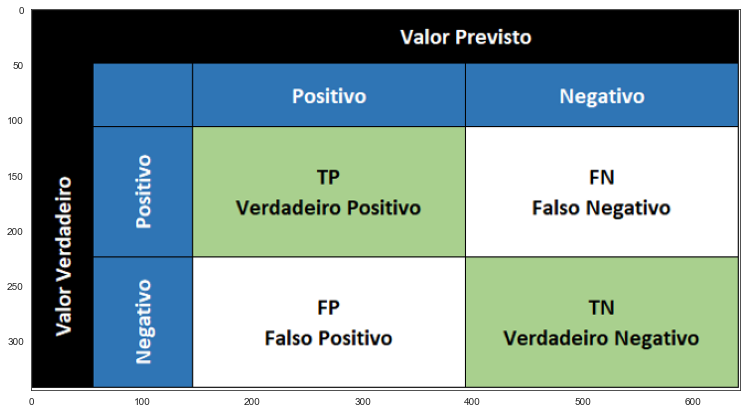

In [105]:
from PIL import Image
im = np.array(Image.open('matriz_confusao.png'))
sns.set_style("white")
plt.figure(figsize=(15,7))
plt.imshow(im)
plt.show()

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Text(0.5, 16.0, 'Prediction')

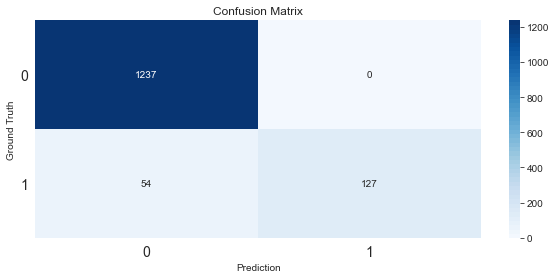

In [107]:
plt.figure(figsize=(10, 4))

heatmap = sns.heatmap(
    data=pd.DataFrame(confusion_matrix(label_test, pred_test_MNB)),
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues", 50),
)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize=14)
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(), rotation=0, fontsize=14
)

plt.title("Confusion Matrix")
plt.ylabel("Ground Truth")
plt.xlabel("Prediction")

In [108]:
print(classification_report(label_test,pred_test_MNB))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1237
           1       1.00      0.70      0.82       181

    accuracy                           0.96      1418
   macro avg       0.98      0.85      0.90      1418
weighted avg       0.96      0.96      0.96      1418



Por meio da matriz de confusão, temos:

* 1210 mensagens sendo presumidos foram bem previstos: True Negative (TN);
* 0 spam mensagens foram detectados como spam: Falso Positivo (FP);
* 79 mensagens de spam foram detectados como ham: False Negative (FN);
* 129 spam mensagens foram detectados como spam: True Positive (TP).

# Metricas
Vejamos a pontuação obtida pelas previsões:

O relatório de classificação trata das principais métricas em um problema de classificação.

Você terá precisão, recall, pontuação f1 e suporte para cada classe que estiver tentando encontrar.

* O **recall** significa "quantos desta classe você encontra em todo o número de elementos desta classe"

* A **precision** será "quantos estão corretamente classificados entre essa classe"

* A **f1-score** é a média harmônica entre precisão e recuperação

* O **support** é o número de ocorrências de determinada classe em seu conjunto de dados.

In [109]:
from sklearn.metrics import classification_report, accuracy_score

In [110]:
print(classification_report(label_test,pred_test_MNB))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1237
           1       1.00      0.70      0.82       181

    accuracy                           0.96      1418
   macro avg       0.98      0.85      0.90      1418
weighted avg       0.96      0.96      0.96      1418



### Avaliando modelo

Nossa base é desbalanceada lembra? Então a acurácia nesse caso não é a melhor métrica de avaliação do modelo.

Note que o recall (número de acertos) para a classe ham é muito alta, por outro lado é bem baixa para a classe spam.

Isso só reforça o que já sabemos, nosso modelo está enviesado, ele aprendeu mais sobre a classe que tinha uma maior quantidade de exemplos.

## Métodos para lidar com dados desbalanceados

* Undersampling – Consiste em reduzir de forma aleatória os exemplos da classe majoritária.
* NearMiss – É um algoritmo de undersampling que consiste em reduzir de forma aleatória os exemplos da classe majoritária, porém ele seleciona os exemplos com base na distância.

Quando instâncias das duas classes estão muito próximas umas das outras, removemos as instâncias da classe majoritária para termos uma maior separabilidade entre as classes.

### Aplicando NearMiss:
* Método de Undersampling.
* Iguala as quantidade de amostras entre as classes.

In [111]:
from imblearn.under_sampling import NearMiss

In [112]:
nr = NearMiss()

In [113]:
X, y = nr.fit_sample(data_tfidf, df["class"])

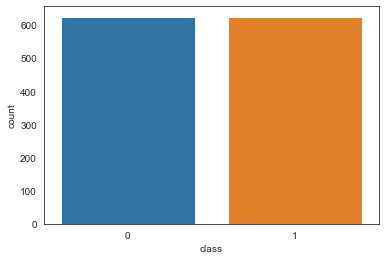

In [114]:
ax = sns.countplot(x=y)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [126]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

In [127]:
nb_model.fit(X_train, y_train)

MultinomialNB()

In [128]:
y_pred = nb_model.predict(X_test)

In [129]:
accuracy_score(y_test, y_pred)

0.9009584664536742

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       161
           1       0.91      0.88      0.90       152

    accuracy                           0.90       313
   macro avg       0.90      0.90      0.90       313
weighted avg       0.90      0.90      0.90       313



Text(0.5, 16.0, 'Prediction')

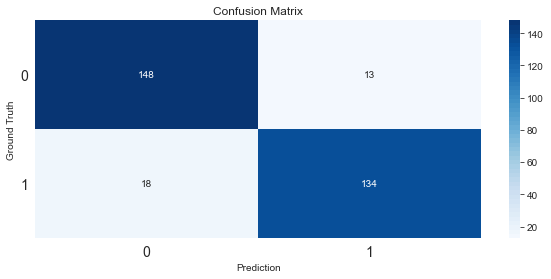

In [131]:
plt.figure(figsize=(10, 4))

heatmap = sns.heatmap(
    data=pd.DataFrame(confusion_matrix(y_test, y_pred)),
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues", 50),
)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize=14)
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(), rotation=0, fontsize=14
)

plt.title("Confusion Matrix")
plt.ylabel("Ground Truth")
plt.xlabel("Prediction")

## K-Fold Cross Validation

A validação cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados.  
Esta técnica é amplamente empregada em problemas onde o objetivo da modelagem é a predição.  
Busca-se então estimar o quão preciso é este modelo na prática, ou seja, o seu desempenho para um novo conjunto de dados.

In [132]:
from sklearn import model_selection

In [133]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = model_selection.KFold(n_splits=5)

results = cross_validate(nb_model,
                         X_test,
                         y_test,
                         cv=kfold,
                         scoring=scoring)

In [134]:
results

{'fit_time': array([0.00298738, 0.00202227, 0.00099683, 0.00100017, 0.00099516]),
 'score_time': array([0.00296474, 0.00199938, 0.00196338, 0.00199461, 0.00199151]),
 'test_accuracy': array([0.82539683, 0.9047619 , 0.84126984, 0.82258065, 0.87096774]),
 'test_precision': array([0.78787879, 0.91176471, 0.8       , 0.75862069, 0.90625   ]),
 'test_recall': array([0.86666667, 0.91176471, 0.85714286, 0.84615385, 0.85294118]),
 'test_f1_score': array([0.82539683, 0.91176471, 0.82758621, 0.8       , 0.87878788])}

## Conclusão

Tivemos um bom resultado com o modelo acima, após utilizar a tecnica de undersample + cross validation vimos que o modelo nao está com overfitting.

---

# Fazendo predição na base de teste

Ler base de teste e fazer a predição

In [135]:
df_test = pd.read_csv('TestSet/sms-hamspam-test.csv',  sep='\t', names=['message'])
df_test.head()

,message
0,I know that my friend already told that.
1,It took Mr owl 3 licks
2,Dunno y u ask me.
3,K.k:)advance happy pongal.
4,I know but you need to get hotel now. I just g...


In [136]:
df_test['message_clean'] = df_test['message'].apply(remove_punctuation_and_stopwords)
df_test.head()

,message,message_clean
0,I know that my friend already told that.,"[know, friend, already, told]"
1,It took Mr owl 3 licks,"[took, mr, owl, 3, licks]"
2,Dunno y u ask me.,"[dunno, u, ask]"
3,K.k:)advance happy pongal.,"[kkadvance, happy, pongal]"
4,I know but you need to get hotel now. I just g...,"[know, need, get, hotel, got, invitation, apol..."


In [137]:
dataset_test_predict = untokenize_text(df_test['message_clean'])

In [138]:
# bag of words
X_new_vect = vectorizer.transform(dataset_test_predict)

In [140]:
# TF-IDF:
X_new_tfidf = tfidf_transformer.transform(X_new_vect)

In [141]:
df_test['predict'] = nb_model.predict(X_new_tfidf)

In [144]:
df_test.head()

,message,message_clean,predict
0,I know that my friend already told that.,"[know, friend, already, told]",0
1,It took Mr owl 3 licks,"[took, mr, owl, 3, licks]",1
2,Dunno y u ask me.,"[dunno, u, ask]",0
3,K.k:)advance happy pongal.,"[kkadvance, happy, pongal]",0
4,I know but you need to get hotel now. I just g...,"[know, need, get, hotel, got, invitation, apol...",0


## Organizando e salvando csv dos predict da forma que foi solicitado no desafio

In [150]:
# Or
df_test = df_test.reindex(columns=['predict', 'message'])
df_test["predict"] = df_test["predict"].map({0: "ham", 1: "spam"})
df_test.head()

,predict,message
0,ham,I know that my friend already told that.
1,spam,It took Mr owl 3 licks
2,ham,Dunno y u ask me.
3,ham,K.k:)advance happy pongal.
4,ham,I know but you need to get hotel now. I just g...


In [151]:
df_test.to_csv('sms-hamspam-predict-test.csv',index=False, header=False, sep='\t')

---